In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join, basename
from glob import glob
from tqdm import tqdm

from obspy import read
from scipy.fft import fft, fftfreq, ifft

In [2]:
ac_calib = 8.2928e-05

In [3]:
in_dir = '../../data/banner/infrasound/processed/'
# l = os.listdir(in_dir)
l = glob(os.path.join(in_dir, 'c0be4*'))
r = []
for i in l:
    i = os.path.basename(i)
    j = i[5:11]
    if j not in r:
        r.append(j)
r.sort()

In [4]:
name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        power = arr**2
                        power = 1/len(power) * np.cumsum(power)[-1]
                        res[height] = power
                        # ARR = fft(arr)
                        # f = fftfreq(arr.size)
                        # mag = np.abs(ARR**2)
                        # power = sum(mag)/len(arr)
                        # res[height] = power/len(arr)
        
        full_res[day] = res

days: 104it [02:28,  1.43s/it]


In [5]:
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202',0.33] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

Text(0.5, 1.0, 'Power for all bands Banner Vertical Array')

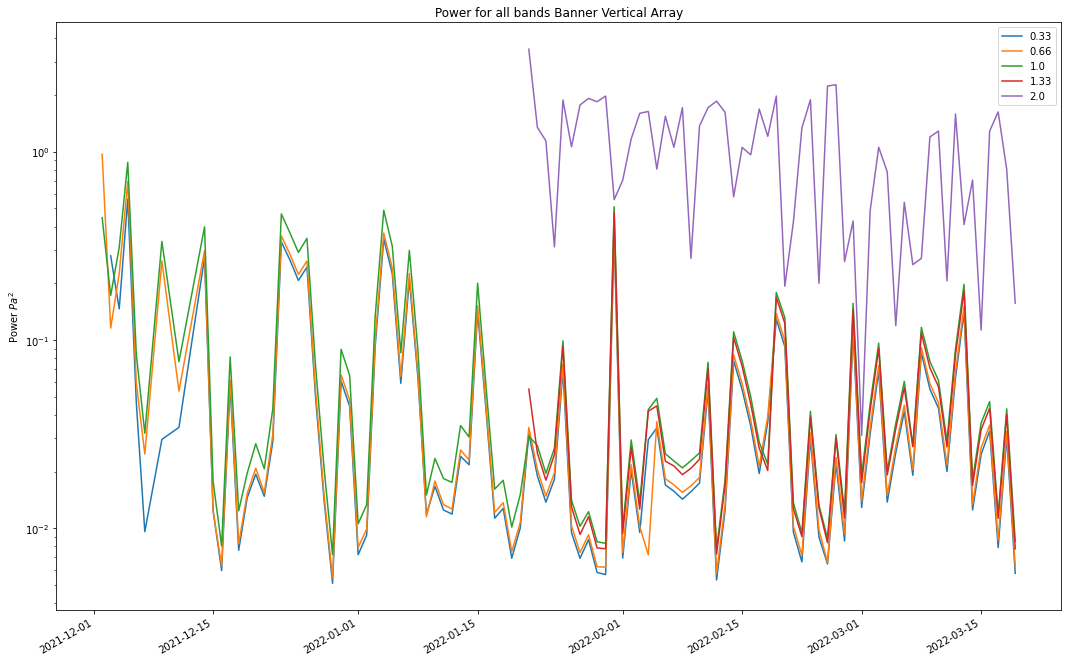

In [6]:
df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title('Power for all bands Banner Vertical Array')

# Filtered to infrasound

In [7]:
f1 = 1
f2 = 10

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res

days: 104it [10:39,  6.15s/it]


In [8]:
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

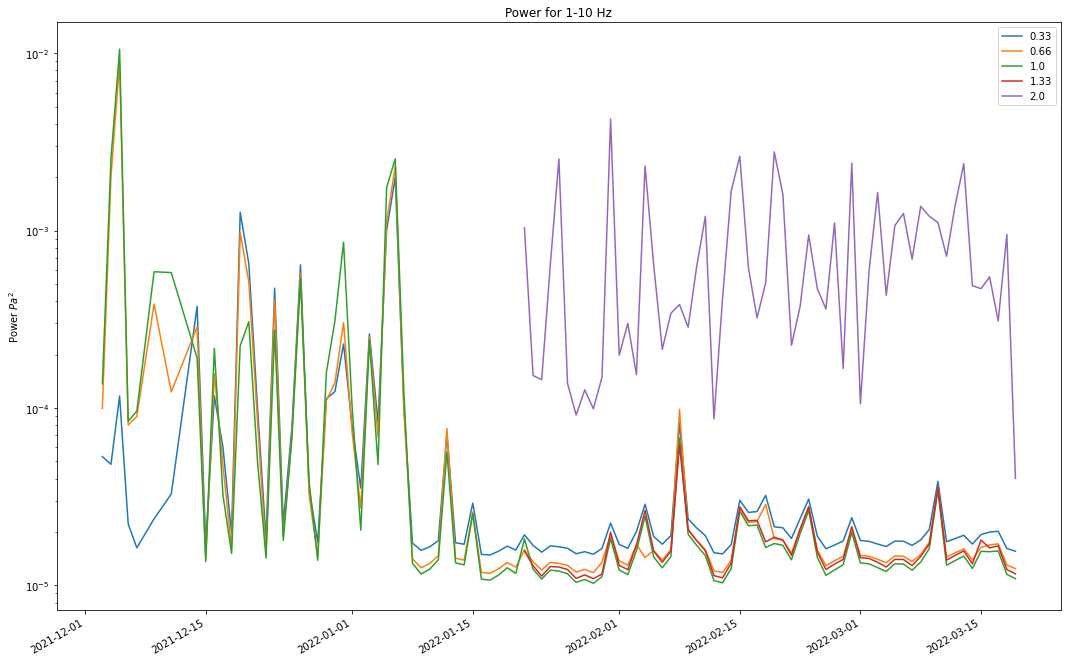

In [9]:
df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
plt.savefig(f'')

days: 104it [10:35,  6.11s/it]


Text(0.5, 1.0, 'Power for 10-20 Hz')

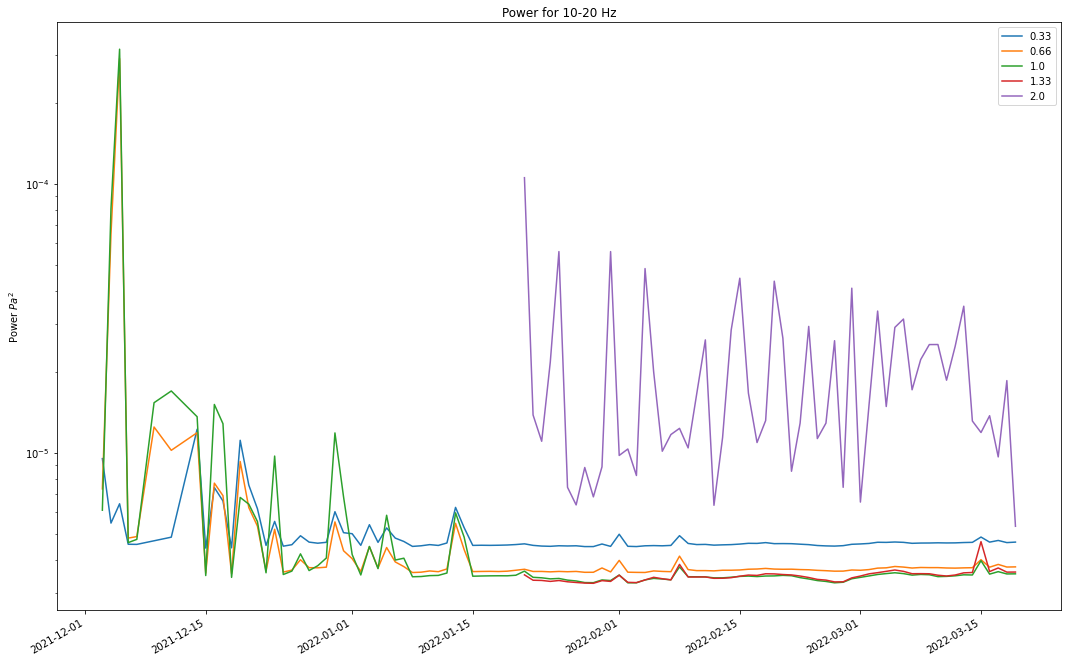

In [10]:
f1 = 10
f2 = 20

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [10:03,  5.80s/it]


Text(0.5, 1.0, 'Power for 10-15 Hz')

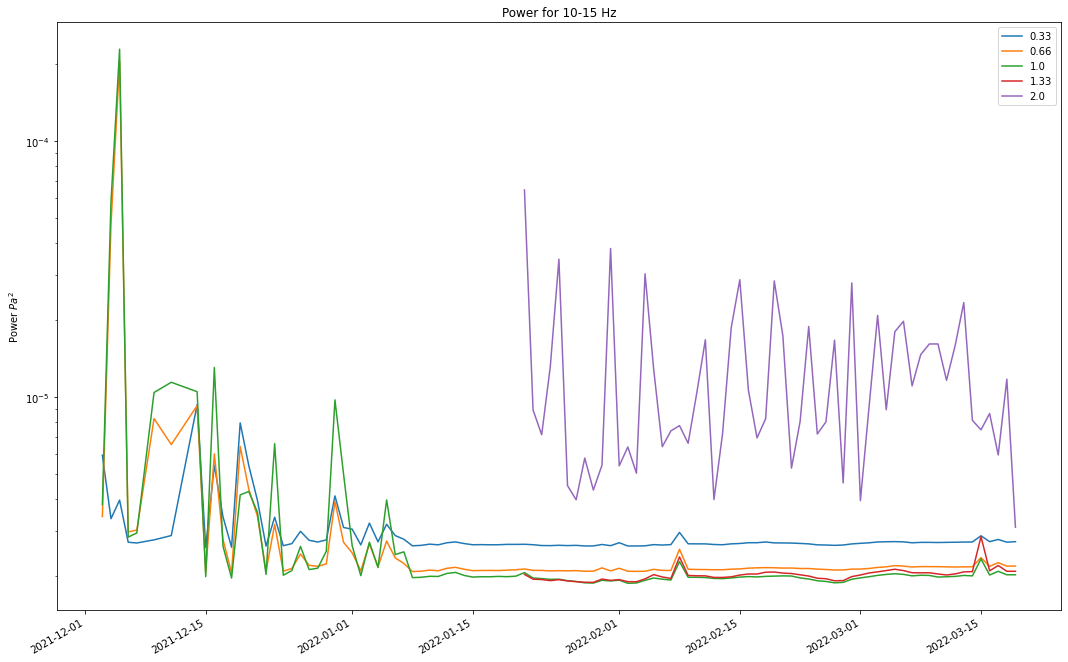

In [11]:
f1 = 10
f2 = 15

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [10:02,  5.80s/it]


Text(0.5, 1.0, 'Power for 15-20 Hz')

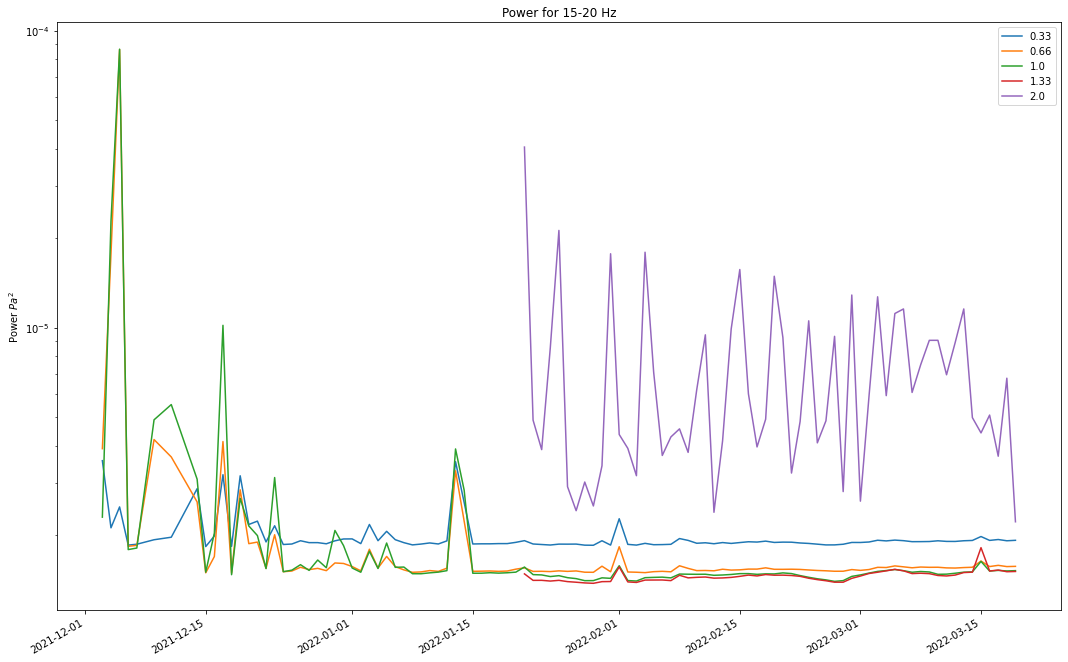

In [12]:
f1 = 15
f2 = 20

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [10:39,  6.15s/it]


Text(0.5, 1.0, 'Power for 20-30 Hz')

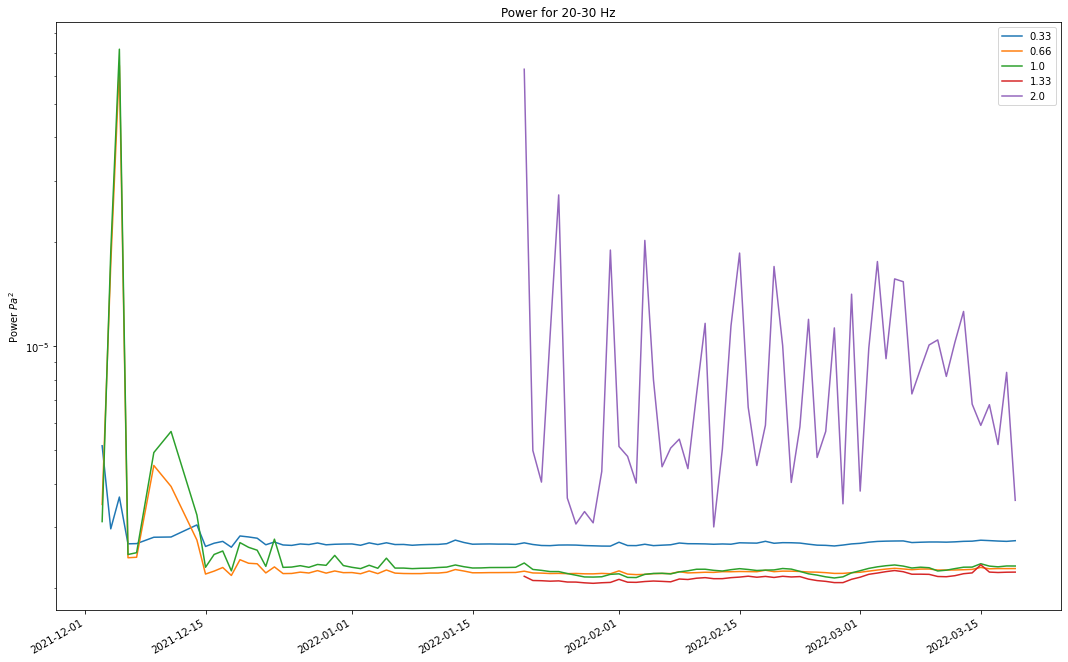

In [13]:
f1 = 20
f2 = 30

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [10:31,  6.07s/it]


Text(0.5, 1.0, 'Power for 30-40 Hz')

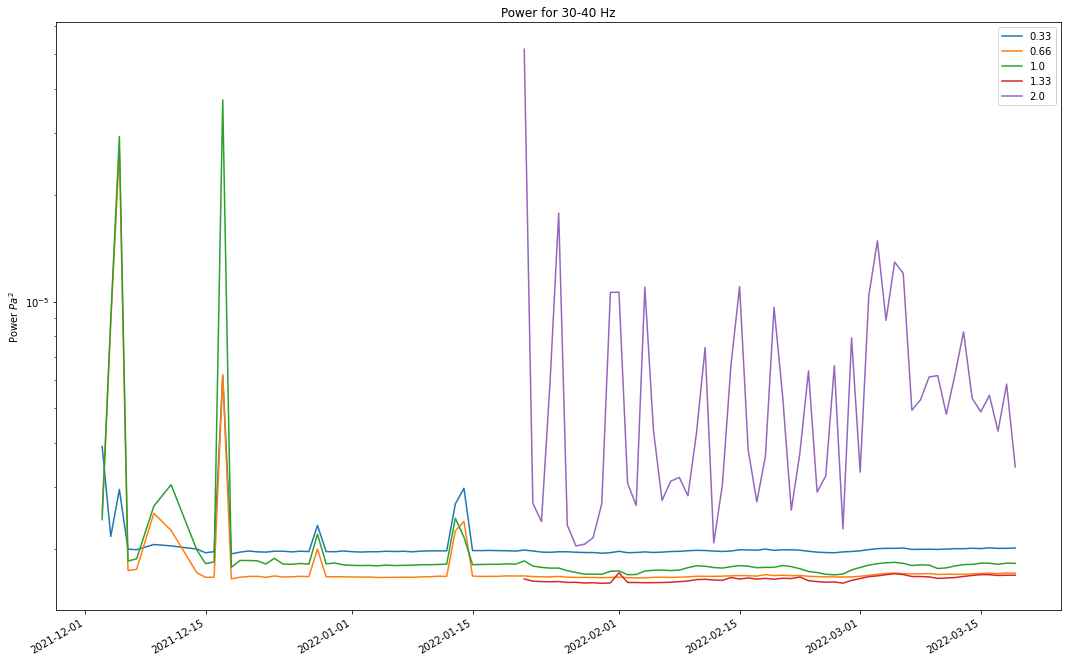

In [14]:
f1 = 30
f2 = 40

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [10:42,  6.17s/it]


Text(0.5, 1.0, 'Power for 40-50 Hz')

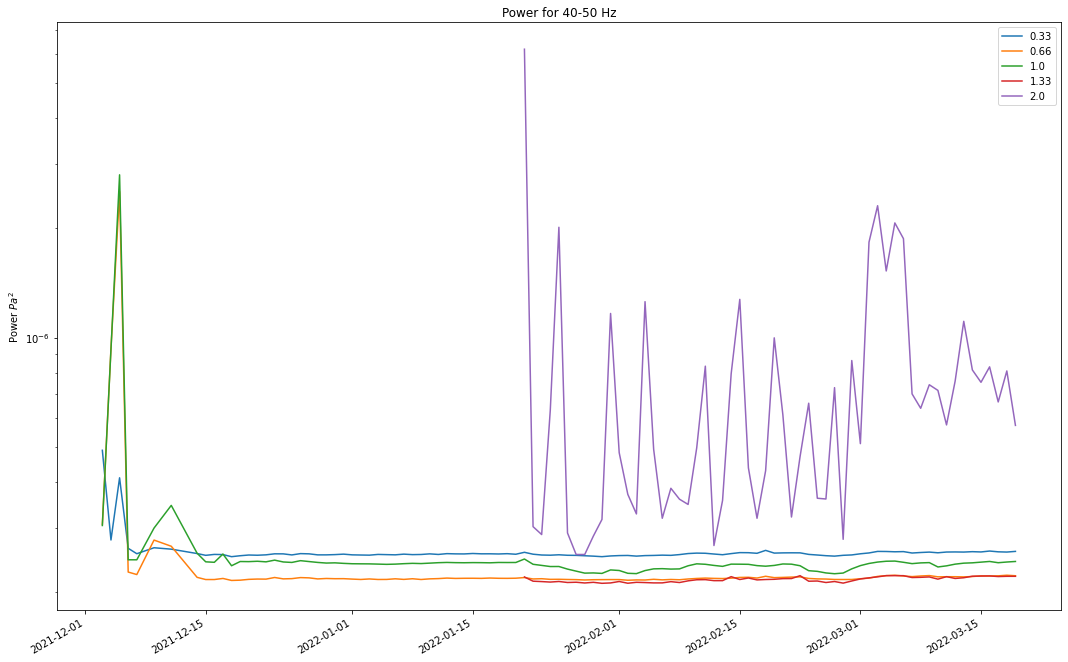

In [15]:
f1 = 40
f2 = 50

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [15:09,  8.75s/it]


Text(0.5, 1.0, 'Power for 1-50 Hz')

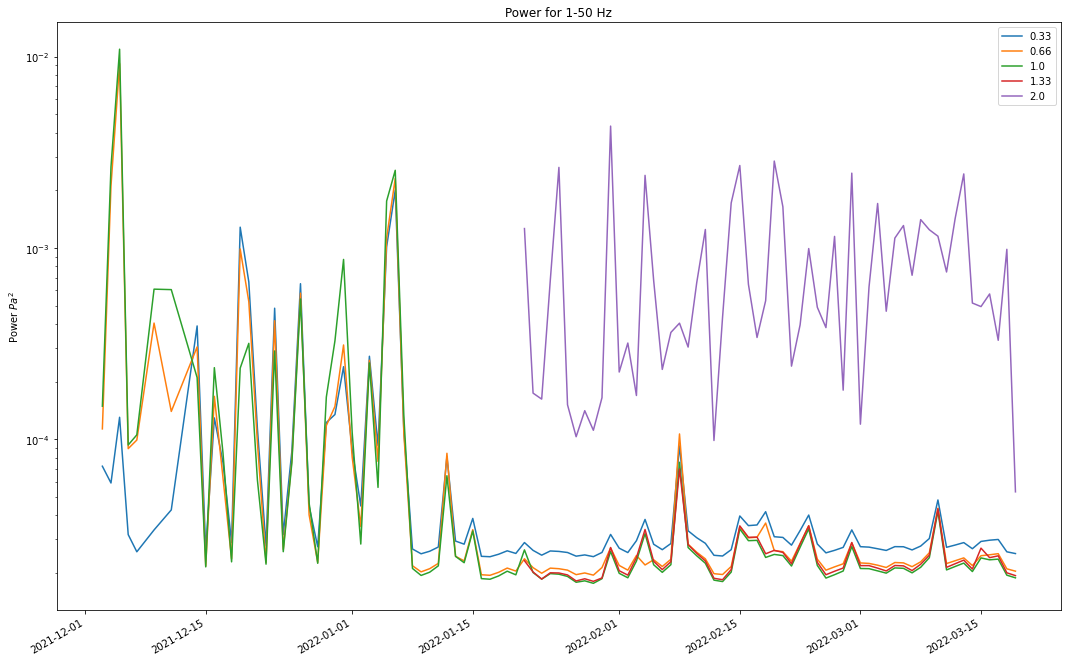

In [16]:
f1 = 1
f2 = 50

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')

days: 104it [15:20,  8.85s/it]


Text(0.5, 1.0, 'Power for 50-100 Hz')

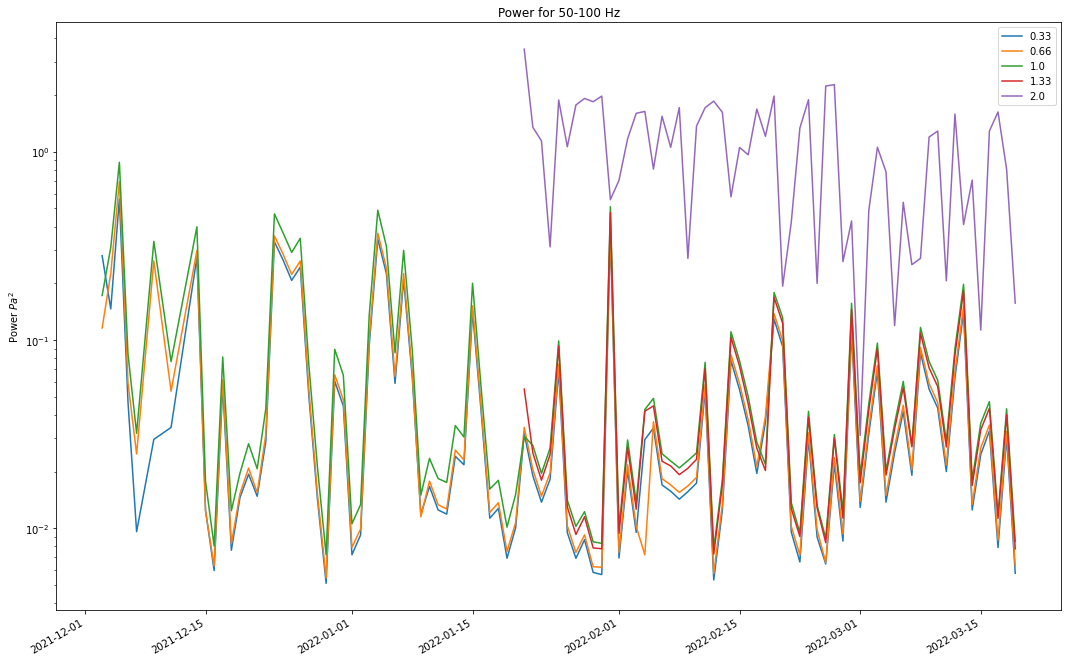

In [17]:
f1 = 50
f2 = 100

name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        arr = arr - np.nanmean(arr)
                        # power = arr**2
                        # power = 1/len(power) * np.cumsum(power)[-1]
                        # res[height] = power
                        ARR = fft(arr)
                        f = fftfreq(arr.size, 1/sps)
                        start = int(f1/100*len(ARR))
                        end = int(f2/100*len(ARR))
                        sub_ARR = ARR[start:end]
                        mag = np.abs(sub_ARR**2)
                        power = sum(mag)/len(arr)
                        res[height] = 2* power/len(arr)
        full_res[day] = res
        
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy
df.loc['211202', : ] = np.nan
df.index = pd.to_datetime(df.index, format = '%y%m%d')
df = df.reindex(sorted(df.columns), axis = 1)

df.plot(figsize = (18,12))
plt.yscale('log')
plt.ylabel('Power $Pa^{2}$')
plt.title(f'Power for {f1}-{f2} Hz')
# plt.savefig(f'')